In [94]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [2]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 1000
pd.options.display.max_columns= 1000

In [3]:
%%capture

#the %%capture makes sure not the whole of last assignment is printed here

#import Dataframes as df


#This imports dataframes from other code.
%run "Dataframes.ipynb"


In [4]:
#framedict = df.framedict
framedict.keys()

dict_keys(['Deaths', 'Demographics', 'Age', 'Hospitals', 'Names'])

In [5]:
hosp_frame = framedict['Hospitals']


In [6]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [7]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [8]:
india_s_masters.head()

missingcheck(india_s_masters['censuscode'],641 )

DISTRICT           ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
0    Adilabad  Andhra Pradesh         28          1         532   
1        Agra   Uttar Pradesh          9         15         146   
2   Ahmadabad         Gujarat         24          7         474   
3  Ahmadnagar     Maharashtra         27         26         522   
4      Aizawl         Mizoram         15          3         283   

                                            geometry  
0  POLYGON ((78.84972 19.76010, 78.85102 19.75945...  
1  POLYGON ((78.19803 27.40280, 78.19804 27.40278...  
2  MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...  
3  POLYGON ((74.67333 19.94670, 74.67393 19.93509...  
4  POLYGON ((92.98749 24.40453, 92.99107 24.40236...

0 values are missing.


[]

In [9]:
# We can merge the dataframes on the censuscodes. 
# These codes represent the numbers that were given to the districts
type(india_s_masters["censuscode"])
type(hosp_frame["censuscode"])

pandas.core.series.Series

pandas.core.series.Series

In [10]:
#df.missingcheck(india_s_masters['DT_CEN_CD'],640)

<AxesSubplot:>

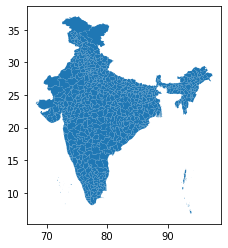

In [11]:
india_s_masters.plot()

In [12]:
##for joining two files
india_joined = india_s_masters.merge(champion,on='censuscode')
india_joined.head(2)

DISTRICT           ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
0  Adilabad  Andhra Pradesh         28          1         532   
1      Agra   Uttar Pradesh          9         15         146   

                                            geometry  pc11_state_id  \
0  POLYGON ((78.84972 19.76010, 78.85102 19.75945...             28   
1  POLYGON ((78.19803 27.40280, 78.19804 27.40278...              9   

   total_cases  total_deaths  pc11_pca_tot_p   Literacy  population density  \
0          0.0           0.0       2741239.0  1411281.0           330.31888   
1      11831.0         182.0       4418797.0  2092567.0           887.23541   

   slum population  Urban population share  Beds (IC)  Beds (total)  \
0         207383.0                0.396791       12.0          12.0   
1         261491.0                0.331309        0.0           0.0   

   Care facilities (hospitals/clinics)  average age  deaths per 100.000  \
0                            42.535145    29.494594            0.000000   
1                            62.677639    24.707078            4.118768   

   cases per 100.000  
0           0.000000  
1         267.742555

In [13]:
india_joined.loc[india_joined['ST_NM'] == 'NCT of Delhi']

DISTRICT         ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
153        East  NCT of Delhi          7          4          93   
390   New Delhi  NCT of Delhi          7          5          94   
393  North East  NCT of Delhi          7          3          92   
396  North West  NCT of Delhi          7          1          90   
517       South  NCT of Delhi          7          9          98   
521  South West  NCT of Delhi          7          8          97   
579        West  NCT of Delhi          7          7          96   

                                              geometry  pc11_state_id  \
153  POLYGON ((77.30482 28.57678, 77.29593 28.58194...              7   
390  POLYGON ((77.26042 28.62286, 77.26267 28.62114...              7   
393  POLYGON ((77.25066 28.66244, 77.25021 28.66266...              7   
396  POLYGON ((77.17093 28.66833, 77.16689 28.67303...              7   
517  POLYGON ((77.26455 28.60747, 77.26558 28.60738...              7   
521  POLYGON ((77.18253 28.64817, 77.18380 28.64638...              7   
579  POLYGON ((77.17093 28.66833, 77.17072 28.66817...              7   

     total_cases  total_deaths  pc11_pca_tot_p   Literacy  population density  \
153          0.0           0.0       1709346.0   681517.0         36073.20700   
390     750156.0       11436.0        142004.0  1611588.0         61283.39500   
393          0.0           0.0       2241624.0  2707855.0         10354.47900   
396          0.0           0.0       3656539.0   599796.0           764.38702   
517          0.0           0.0       2731929.0   442360.0                 NaN   
521          0.0           0.0       2292958.0   114179.0                 NaN   
579          0.0           0.0       2543243.0  1352998.0        134998.11000   

     slum population  Urban population share  Beds (IC)  Beds (total)  \
153     88075.000977                0.980015        NaN           NaN   
390    173453.886719                0.990397        NaN           NaN   
393    376234.050781                0.941488        NaN           NaN   
396     20646.000000                0.226855        NaN           NaN   
517     85146.181107                1.000000        NaN           NaN   
521     11215.947510                1.000000        NaN           NaN   
579    196756.546875                0.997935        NaN           NaN   

     Care facilities (hospitals/clinics)  average age  deaths per 100.000  \
153                                  NaN    29.417171            0.000000   
390                                  NaN    29.946973         8053.294273   
393                                  NaN    26.856877            0.000000   
396                                  NaN    28.811548            0.000000   
517                                  NaN    27.868524            0.000000   
521                                  NaN    30.087117            0.000000   
579                                  NaN    29.089092            0.000000   

     cases per 100.000  
153           0.000000  
390      528263.992564  
393           0.000000  
396           0.000000  
517           0.000000  
521           0.000000  
579           0.000000

In [14]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [15]:
india_s_masters['random'] = df

In [16]:
india_s_masters.head()

DISTRICT           ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
0    Adilabad  Andhra Pradesh         28          1         532   
1        Agra   Uttar Pradesh          9         15         146   
2   Ahmadabad         Gujarat         24          7         474   
3  Ahmadnagar     Maharashtra         27         26         522   
4      Aizawl         Mizoram         15          3         283   

                                            geometry  random  
0  POLYGON ((78.84972 19.76010, 78.85102 19.75945...      76  
1  POLYGON ((78.19803 27.40280, 78.19804 27.40278...      49  
2  MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...      24  
3  POLYGON ((74.67333 19.94670, 74.67393 19.93509...      28  
4  POLYGON ((92.98749 24.40453, 92.99107 24.40236...      23

In [17]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [18]:
columns_to_plot = champion.columns.values.tolist()
type(columns_to_plot)

list

In [19]:
columns_to_plot.remove('pc11_state_id')
columns_to_plot.remove("censuscode")

In [20]:
columns_to_plot

['total_cases',
 'total_deaths',
 'pc11_pca_tot_p',
 'Literacy',
 'population density',
 'slum population',
 'Urban population share',
 'Beds (IC)',
 'Beds (total)',
 'Care facilities (hospitals/clinics)',
 'average age',
 'deaths per 100.000',
 'cases per 100.000']

<AxesSubplot:>

Text(0.5, 1.0, 'total_cases')

<AxesSubplot:>

Text(0.5, 1.0, 'total_deaths')

<AxesSubplot:>

Text(0.5, 1.0, 'pc11_pca_tot_p')

<AxesSubplot:>

Text(0.5, 1.0, 'Literacy')

<AxesSubplot:>

Text(0.5, 1.0, 'population density')

<AxesSubplot:>

Text(0.5, 1.0, 'slum population')

<AxesSubplot:>

Text(0.5, 1.0, 'Urban population share')

<AxesSubplot:>

Text(0.5, 1.0, 'Beds (IC)')

<AxesSubplot:>

Text(0.5, 1.0, 'Beds (total)')

<AxesSubplot:>

Text(0.5, 1.0, 'Care facilities (hospitals/clinics)')

<AxesSubplot:>

Text(0.5, 1.0, 'average age')

<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

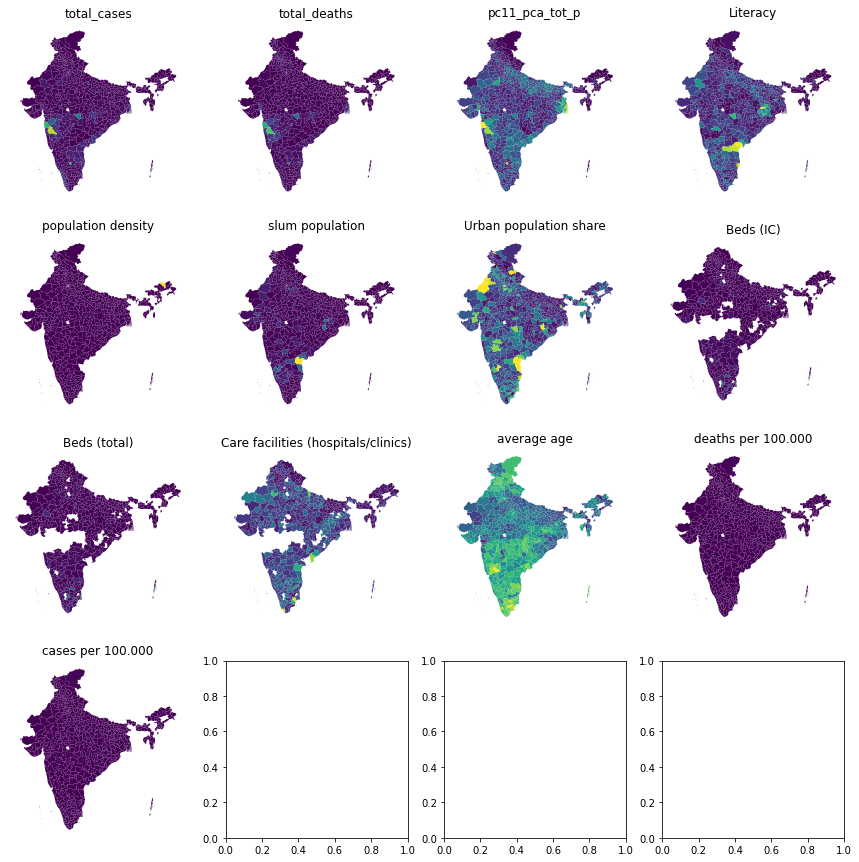

In [21]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [22]:
column = ['population density']

<AxesSubplot:>

Text(0.5, 1.0, 'population density')

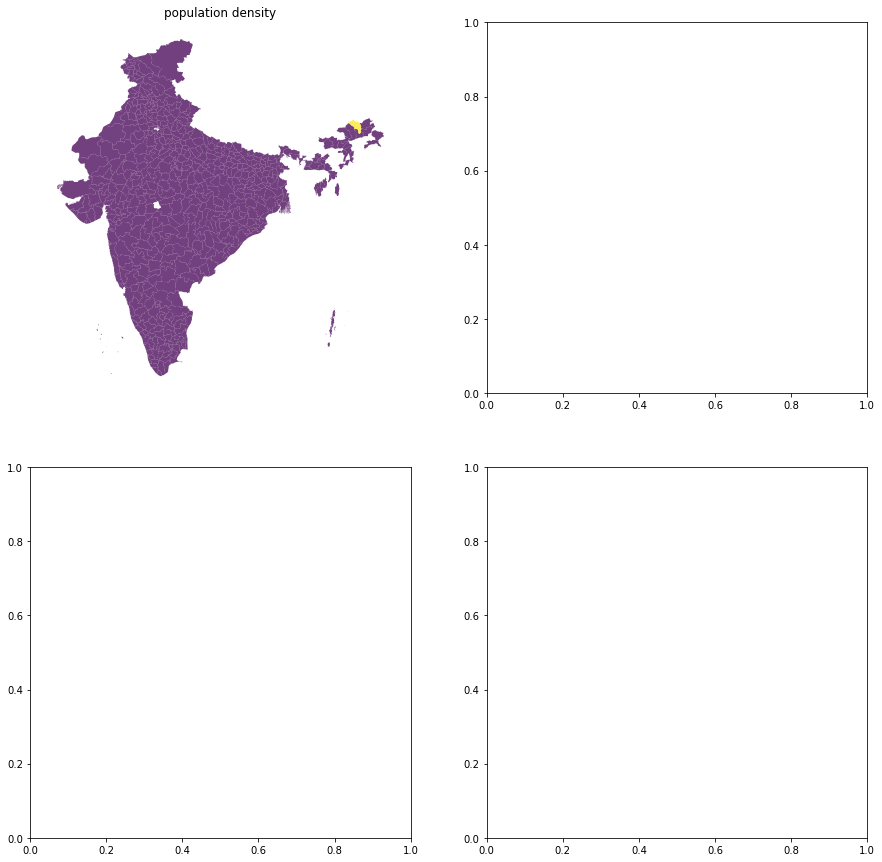

In [23]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [24]:
india_joined.sort_values("population density", ascending = False).head()

DISTRICT               ST_NM  ST_CEN_CD  DT_CEN_CD  censuscode  \
560      Upper Siang  Arunanchal Pradesh         12          8         252   
154  East Garo Hills           Meghalaya         17          2         294   
579             West        NCT of Delhi          7          7          96   
390        New Delhi        NCT of Delhi          7          5          94   
289       Koch Bihar         West Bengal         19          3         329   

                                              geometry  pc11_state_id  \
560  POLYGON ((95.27230 29.04772, 95.27550 29.04492...             12   
154  POLYGON ((91.03234 25.88749, 91.03220 25.87930...             17   
579  POLYGON ((77.17093 28.66833, 77.17072 28.66817...              7   
390  POLYGON ((77.26042 28.62286, 77.26267 28.62114...              7   
289  MULTIPOLYGON (((89.02623 26.51818, 89.03012 26...             19   

     total_cases  total_deaths  pc11_pca_tot_p   Literacy  population density  \
560        361.0           0.0         35320.0    26073.0         4997700.000   
154        459.0           3.0        317917.0    90302.0          144182.000   
579          0.0           0.0       2543243.0  1352998.0          134998.110   
390     750156.0       11436.0        142004.0  1611588.0           61283.395   
289      11999.0          72.0       2819086.0   187527.0           49390.500   

     slum population  Urban population share  Beds (IC)  Beds (total)  \
560         0.000000                0.224143        0.0           0.0   
154         0.000000                0.116845        0.0           0.0   
579    196756.546875                0.997935        NaN           NaN   
390    173453.886719                0.990397        NaN           NaN   
289     19310.000000                0.071952        0.0           0.0   

     Care facilities (hospitals/clinics)  average age  deaths per 100.000  \
560                            28.068426    21.260834            0.000000   
154                            12.315909    24.980466            0.943643   
579                                  NaN    29.089092            0.000000   
390                                  NaN    29.946973         8053.294273   
289                            67.143585    22.591047            2.554019   

     cases per 100.000  
560        1022.083805  
154         144.377306  
579           0.000000  
390      528263.992564  
289         425.634408

In [25]:
india_joined.loc(axis=0)[563]['population density']

184.00331

In [26]:
india_joined.loc(axis=0)[563]

DISTRICT                                                                  Uttara Kannada
ST_NM                                                                          Karnataka
ST_CEN_CD                                                                             29
DT_CEN_CD                                                                              9
censuscode                                                                           563
geometry                               (POLYGON ((74.32140863161553 15.51751435373859...
pc11_state_id                                                                         29
total_cases                                                                      15775.0
total_deaths                                                                       182.0
pc11_pca_tot_p                                                                 1437169.0
Literacy                                                                       1483347.0
population density   

In [27]:
# Creating a scaler so that all variables are on the same scale
scaler = MinMaxScaler()

In [28]:
print(scaler.fit(india_joined[columns_to_plot]))

MinMaxScaler()


In [29]:
#creating Dataframe with scaled data
india_scaled = (scaler.transform(india_joined[columns_to_plot]))

In [30]:
# Renaming the column headers
india_scaled = pd.DataFrame(india_scaled, columns= india_joined[columns_to_plot].columns)
india_scaled

total_cases  total_deaths  pc11_pca_tot_p  Literacy  population density  \
0       0.000000      0.000000        0.247304  0.171092            0.000065   
1       0.015771      0.015050        0.399089  0.253946            0.000177   
2       0.116218      0.205889        0.652020  0.104404            0.000039   
3       0.158646      0.109402        0.410342  0.141829            0.000115   
4       0.004148      0.000910        0.035496  0.004475                 NaN   
..           ...           ...             ...       ...                 ...   
602     0.003009      0.003804        0.004309  0.338973            0.000216   
603     0.001764      0.000662        0.072295  0.072524            0.000077   
604     0.000000      0.000000        0.020823  0.266498            0.000095   
605     0.000000      0.000000        0.008830  0.197304            0.000088   
606     0.001112      0.000083        0.005109  0.370631            0.000071   

     slum population  Urban population share  Beds (IC)  Beds (total)  \
0           0.052966                0.396791   0.016371      0.016371   
1           0.066785                0.331309   0.000000      0.000000   
2           0.030522                0.232794   0.000000      0.000000   
3           0.012998                0.372580        NaN           NaN   
4           0.000766                0.222785   0.000000      0.000000   
..               ...                     ...        ...           ...   
602         0.098790                0.651375   1.000000      1.000000   
603         0.004073                0.082625        NaN           NaN   
604         0.027713                0.150074   0.308322      0.308322   
605         0.021280                0.200799   0.000000      0.000000   
606         0.036143                0.253406   0.027285      0.027285   

     Care facilities (hospitals/clinics)  average age  deaths per 100.000  \
0                               0.113784     0.697741            0.000000   
1                               0.168963     0.356319            0.000511   
2                               0.132367     0.374684            0.004286   
3                                    NaN     0.519130            0.003616   
4                               0.085093     0.241775            0.000341   
..                                   ...          ...                 ...   
602                             0.401305     0.700724            0.010268   
603                                  NaN     0.103415            0.000123   
604                             0.150349     0.707109            0.000000   
605                             0.258740     0.776296            0.000000   
606                             0.188220     0.469538            0.000193   

     cases per 100.000  
0             0.000000  
1             0.000507  
2             0.002288  
3             0.004959  
4             0.001472  
..                 ...  
602           0.007681  
603           0.000310  
604           0.000000  
605           0.000000  
606           0.002449  

[607 rows x 13 columns]

In [31]:
# Replacing the values of the variables with the scaled data
india_joined[columns_to_plot] = india_scaled[columns_to_plot]

In [32]:
india_joined

DISTRICT                     ST_NM  ST_CEN_CD  DT_CEN_CD  \
0                  Adilabad            Andhra Pradesh         28          1   
1                      Agra             Uttar Pradesh          9         15   
2                 Ahmadabad                   Gujarat         24          7   
3                Ahmadnagar               Maharashtra         27         26   
4                    Aizawl                   Mizoram         15          3   
..                      ...                       ...        ...        ...   
602                   Yanam                Puducherry         34          1   
603                    Tapi                   Gujarat         24         26   
604           South Andaman  Andaman & Nicobar Island         35          3   
605  North & Middle Andaman  Andaman & Nicobar Island         35          2   
606             Lakshadweep               Lakshadweep         31          1   

     censuscode                                           geometry  \
0           532  POLYGON ((78.84972 19.76010, 78.85102 19.75945...   
1           146  POLYGON ((78.19803 27.40280, 78.19804 27.40278...   
2           474  MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...   
3           522  POLYGON ((74.67333 19.94670, 74.67393 19.93509...   
4           283  POLYGON ((92.98749 24.40453, 92.99107 24.40236...   
..          ...                                                ...   
602         634  POLYGON ((82.22052 16.73898, 82.22431 16.73626...   
603         493  POLYGON ((74.08573 21.55513, 74.08672 21.55515...   
604         640  MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...   
605         639  MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...   
606         587  MULTIPOLYGON (((74.10131 11.20431, 74.09908 11...   

     pc11_state_id  total_cases  total_deaths  pc11_pca_tot_p  Literacy  \
0               28     0.000000      0.000000        0.247304  0.171092   
1                9     0.015771      0.015050        0.399089  0.253946   
2               24     0.116218      0.205889        0.652020  0.104404   
3               27     0.158646      0.109402        0.410342  0.141829   
4               15     0.004148      0.000910        0.035496  0.004475   
..             ...          ...           ...             ...       ...   
602             34     0.003009      0.003804        0.004309  0.338973   
603             24     0.001764      0.000662        0.072295  0.072524   
604             35     0.000000      0.000000        0.020823  0.266498   
605             35     0.000000      0.000000        0.008830  0.197304   
606             31     0.001112      0.000083        0.005109  0.370631   

     population density  slum population  Urban population share  Beds (IC)  \
0              0.000065         0.052966                0.396791   0.016371   
1              0.000177         0.066785                0.331309   0.000000   
2              0.000039         0.030522                0.232794   0.000000   
3              0.000115         0.012998                0.372580        NaN   
4                   NaN         0.000766                0.222785   0.000000   
..                  ...              ...                     ...        ...   
602            0.000216         0.098790                0.651375   1.000000   
603            0.000077         0.004073                0.082625        NaN   
604            0.000095         0.027713                0.150074   0.308322   
605            0.000088         0.021280                0.200799   0.000000   
606            0.000071         0.036143                0.253406   0.027285   

     Beds (total)  Care facilities (hospitals/clinics)  average age  \
0        0.016371                             0.113784     0.697741   
1        0.000000                             0.168963     0.356319   
2        0.000000                             0.132367     0.374684   
3             NaN                                  NaN     0.519130   
4        0.000000       

In [141]:
km_list1 = ['deaths per 100.000', 'cases per 100.000', 'Urban population share', 'slum population', 'average age', 'Literacy']
india_joined[km_list1]

deaths per 100.000  cases per 100.000  Urban population share  \
0              0.000000           0.000000                0.396791   
1              0.000511           0.000507                0.331309   
2              0.004286           0.002288                0.232794   
3              0.003616           0.004959                0.372580   
4              0.000341           0.001472                0.222785   
..                  ...                ...                     ...   
602            0.010268           0.007681                0.651375   
603            0.000123           0.000310                0.082625   
604            0.000000           0.000000                0.150074   
605            0.000000           0.000000                0.200799   
606            0.000193           0.002449                0.253406   

     slum population  average age  Literacy  
0           0.052966     0.697741  0.171092  
1           0.066785     0.356319  0.253946  
2           0.030522     0.374684  0.104404  
3           0.012998     0.519130  0.141829  
4           0.000766     0.241775  0.004475  
..               ...          ...       ...  
602         0.098790     0.700724  0.338973  
603         0.004073     0.103415  0.072524  
604         0.027713     0.707109  0.266498  
605         0.021280     0.776296  0.197304  
606         0.036143     0.469538  0.370631  

[607 rows x 6 columns]

In [142]:
kmeans1 = cluster.KMeans(n_clusters=3)
np.random.seed(1234)
kmeanscls1 = kmeans1.fit(india_joined[km_list1])

In [143]:
kmeans2 = cluster.KMeans(n_clusters=5)
np.random.seed(1234)
kmeanscls2 = kmeans2.fit(india_joined[km_list1])

In [144]:
kmeans3 = cluster.KMeans(n_clusters=7)
np.random.seed(1234)
kmeanscls3 = kmeans2.fit(india_joined[km_list1])

In [145]:
india_joined['kmeans1'] = kmeanscls.labels_
india_joined['kmeans2'] = kmeanscls.labels_
india_joined['kmeans3'] = kmeanscls.labels_

In [146]:
kme_urb = india_joined[km_list1]
kme_urb

deaths per 100.000  cases per 100.000  Urban population share  \
0              0.000000           0.000000                0.396791   
1              0.000511           0.000507                0.331309   
2              0.004286           0.002288                0.232794   
3              0.003616           0.004959                0.372580   
4              0.000341           0.001472                0.222785   
..                  ...                ...                     ...   
602            0.010268           0.007681                0.651375   
603            0.000123           0.000310                0.082625   
604            0.000000           0.000000                0.150074   
605            0.000000           0.000000                0.200799   
606            0.000193           0.002449                0.253406   

     slum population  average age  Literacy  
0           0.052966     0.697741  0.171092  
1           0.066785     0.356319  0.253946  
2           0.030522     0.374684  0.104404  
3           0.012998     0.519130  0.141829  
4           0.000766     0.241775  0.004475  
..               ...          ...       ...  
602         0.098790     0.700724  0.338973  
603         0.004073     0.103415  0.072524  
604         0.027713     0.707109  0.266498  
605         0.021280     0.776296  0.197304  
606         0.036143     0.469538  0.370631  

[607 rows x 6 columns]

In [147]:
kme_urb['kmeans1'] = kmeanscls1.labels_
kme_urb

C:\Users\Arno\AppData\Local\Temp/ipykernel_20104/573129248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kme_urb['kmeans1'] = kmeanscls1.labels_


deaths per 100.000  cases per 100.000  Urban population share  \
0              0.000000           0.000000                0.396791   
1              0.000511           0.000507                0.331309   
2              0.004286           0.002288                0.232794   
3              0.003616           0.004959                0.372580   
4              0.000341           0.001472                0.222785   
..                  ...                ...                     ...   
602            0.010268           0.007681                0.651375   
603            0.000123           0.000310                0.082625   
604            0.000000           0.000000                0.150074   
605            0.000000           0.000000                0.200799   
606            0.000193           0.002449                0.253406   

     slum population  average age  Literacy  kmeans1  
0           0.052966     0.697741  0.171092        2  
1           0.066785     0.356319  0.253946        0  
2           0.030522     0.374684  0.104404        0  
3           0.012998     0.519130  0.141829        2  
4           0.000766     0.241775  0.004475        0  
..               ...          ...       ...      ...  
602         0.098790     0.700724  0.338973        1  
603         0.004073     0.103415  0.072524        0  
604         0.027713     0.707109  0.266498        2  
605         0.021280     0.776296  0.197304        2  
606         0.036143     0.469538  0.370631        2  

[607 rows x 7 columns]

In [149]:
size_of_clusters = kme_urb.groupby('kmeans1').size()
size_of_clusters

kmeans1
0    302
1     75
2    230
dtype: int64

In [151]:
kme_urb = kme_urb.set_index('kmeans1')
kme_urb.head()

deaths per 100.000  cases per 100.000  Urban population share  \
kmeans1                                                                  
2                  0.000000           0.000000                0.396791   
0                  0.000511           0.000507                0.331309   
0                  0.004286           0.002288                0.232794   
2                  0.003616           0.004959                0.372580   
0                  0.000341           0.001472                0.222785   

         slum population  average age  Literacy  
kmeans1                                          
2               0.052966     0.697741  0.171092  
0               0.066785     0.356319  0.253946  
0               0.030522     0.374684  0.104404  
2               0.012998     0.519130  0.141829  
0               0.000766     0.241775  0.004475

In [152]:
kme_urb = kme_urb.stack()
kme_urb.head(100)

kmeans1                        
2        deaths per 100.000        0.000000
         cases per 100.000         0.000000
         Urban population share    0.396791
         slum population           0.052966
         average age               0.697741
                                     ...   
         Literacy                  0.191457
         deaths per 100.000        0.000287
         cases per 100.000         0.000582
         Urban population share    0.314163
         slum population           0.028269
Length: 100, dtype: float64

In [153]:
kme_urb = kme_urb.reset_index()
kme_urb.head()

kmeans1                 level_1         0
0        2      deaths per 100.000  0.000000
1        2       cases per 100.000  0.000000
2        2  Urban population share  0.396791
3        2         slum population  0.052966
4        2             average age  0.697741

In [154]:
kme_urb = kme_urb.rename({'level_1': 'Characteristics', 0:'Values'}, axis =1)
kme_urb.head()

kmeans1         Characteristics    Values
0        2      deaths per 100.000  0.000000
1        2       cases per 100.000  0.000000
2        2  Urban population share  0.396791
3        2         slum population  0.052966
4        2             average age  0.697741

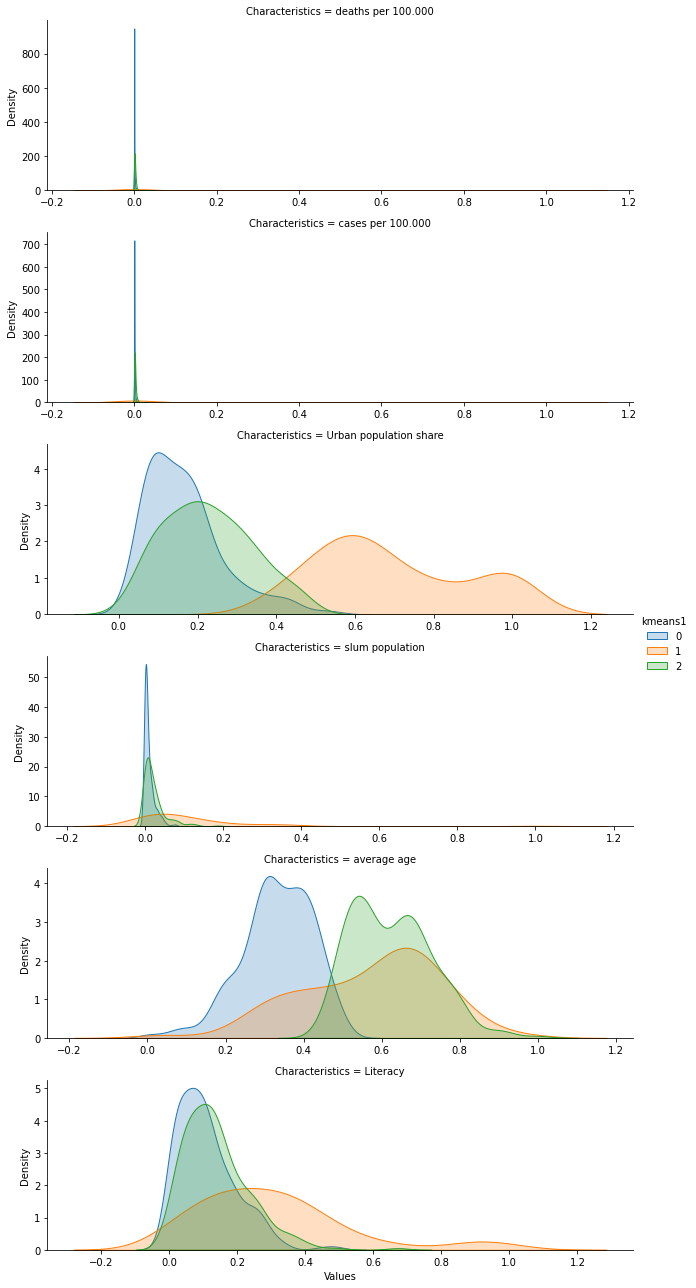

In [156]:
facets = sns.FacetGrid(data=kme_urb, row='Characteristics', hue='kmeans1', \
                  sharey=False, sharex=False, aspect=3)
_ = facets.map(sns.kdeplot, 'Values', shade= True).add_legend()

<AxesSubplot:>

(66.72479680849465, 98.87674485168904, 6.681975025549581, 37.391159208294376)

Text(0.5, 1.0, 'grouping of COVID cases and deaths')

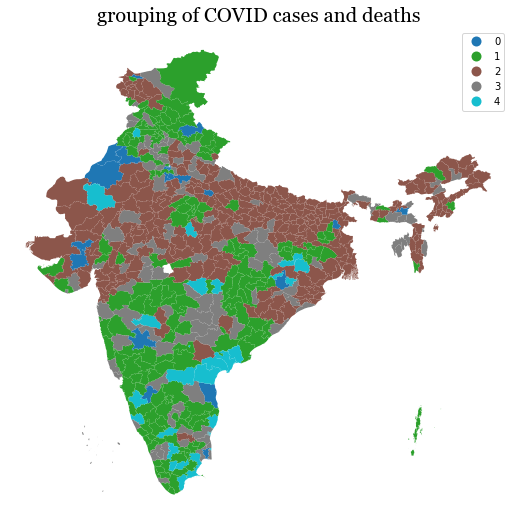

In [157]:
f, ax = plt.subplots(1, figsize=(9, 9))

india_joined.plot(column='kmeans1', categorical=True, legend=True, linewidth=1, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('grouping of COVID cases and deaths', font= 'georgia', fontsize = 20)
plt.show()
